In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.optimize as opt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
df[['output']].value_counts()

output
1         165
0         138
Name: count, dtype: int64

In [5]:
x = df[['age', 'sex', 'cp','trtbps'	,'chol'	,'fbs'	,'restecg'	,'thalachh'	,'exng'	,'oldpeak'	,'slp'	,'caa',	'thall']]
X = np.asanyarray(x)
y = df[['output']]
Y = np.asanyarray(y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=4)

In [24]:
kernels = ['linear','poly','rbf','sigmoid']
yhats = list()
clf = list()
for k in kernels:
    clf.append(svm.SVC(kernel=k).fit(x_train,y_train))
    yhats.append(clf[-1].predict(x_test))
    


/home/reza/course/machineLearning/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/reza/course/machineLearning/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/reza/course/machineLearning/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/reza/course/machineLearning/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was 

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

Confusion matrix, without normalization
[[22  3]
 [ 2 34]]


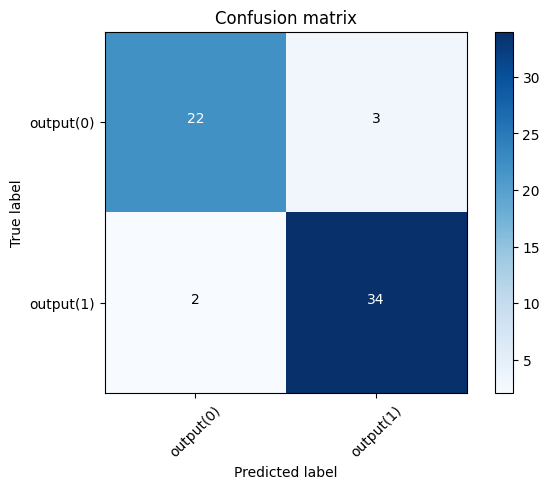

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhats[0], labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhats[0]))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output(0)','output(1)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.70      0.56      0.62        25
           1       0.73      0.83      0.78        36

    accuracy                           0.72        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.72      0.71        61

Confusion matrix, without normalization
[[14 11]
 [ 6 30]]


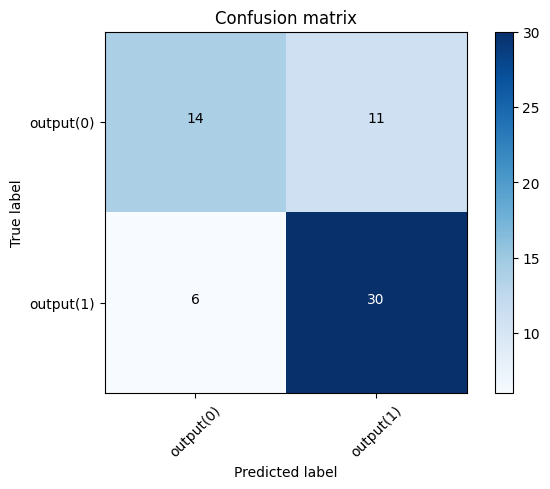

In [32]:
cnf_matrix = confusion_matrix(y_test, yhats[1], labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhats[1]))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output(0)','output(1)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        25
           1       0.67      0.86      0.76        36

    accuracy                           0.67        61
   macro avg       0.67      0.63      0.63        61
weighted avg       0.67      0.67      0.65        61

Confusion matrix, without normalization
[[10 15]
 [ 5 31]]


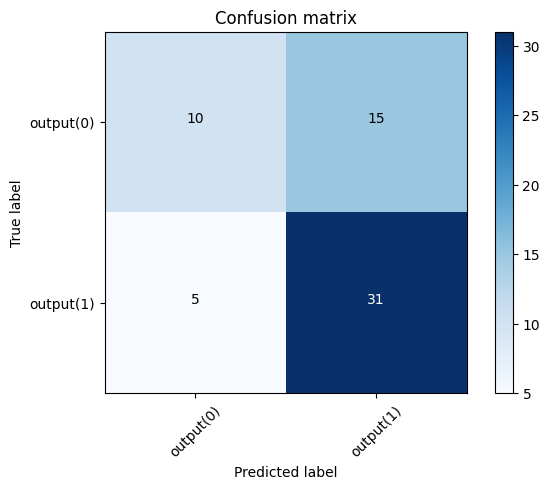

In [33]:
cnf_matrix = confusion_matrix(y_test, yhats[2], labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhats[2]))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output(0)','output(1)'],normalize= False,  title='Confusion matrix')

### linear kernel gived best predict

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, yhats[0], average='weighted')

0.9177578060193311

In [37]:
y_train_hat = clf[0].predict(x_train)
f1_score(y_train, y_train_hat, average='weighted')

0.8627457465355703

In [39]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhats[0])

0.8717948717948718

In [41]:
jaccard_score(y_train,y_train_hat)

0.7828947368421053